235


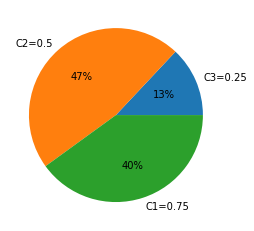

time:  800.9000361963417
NonED/call proportion :  0.85
COVID proportion :  0.15
Initial probabilistic data


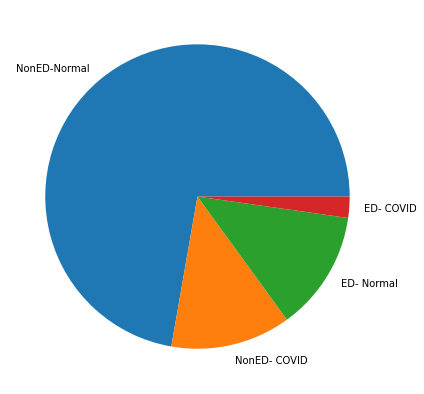

Inflow rate of patients :  2
Risk and IF:  0.2 , 0.5
Service rates mu_1, mu_2, mu_3 :  3 , 10 , 7
Simulation Outcomes : 
Total patients:  437
Number of patients who left the system:  12
Number of patients who are sent home :  23
Number of patients served in total :  388


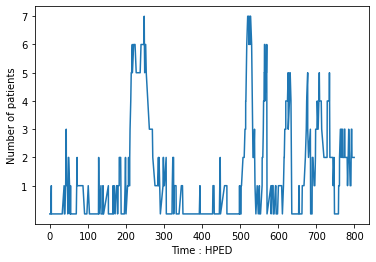

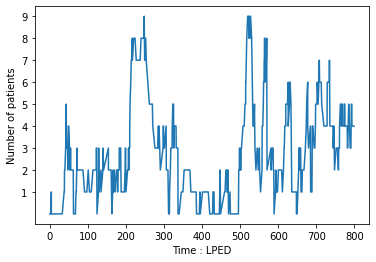

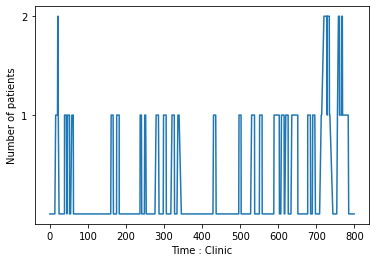

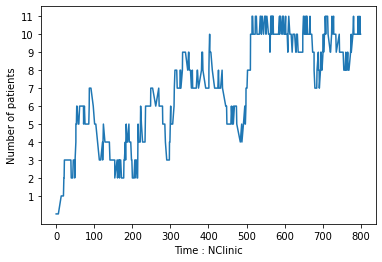

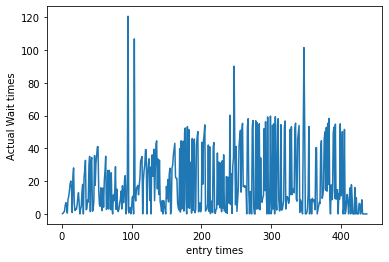

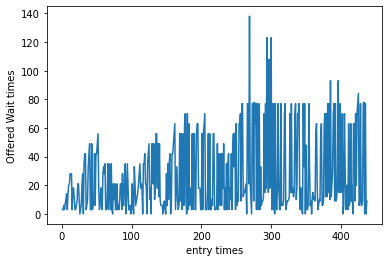

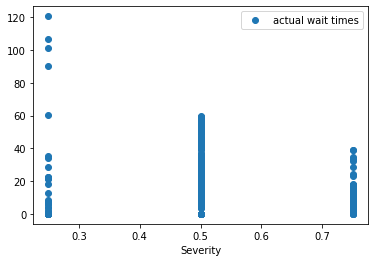

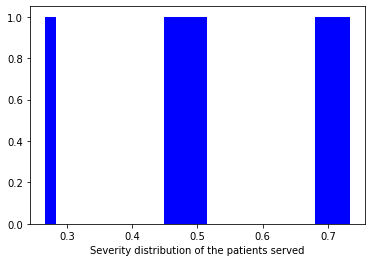

Entering Patients: In ED and NonED assigned by the hospital


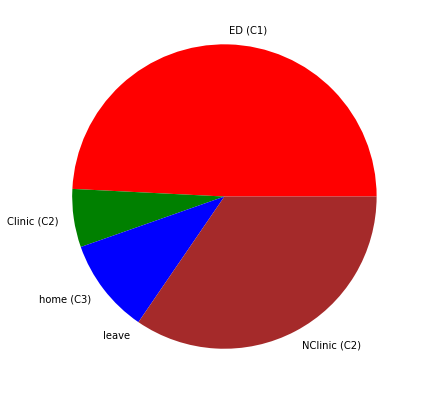

Final service received


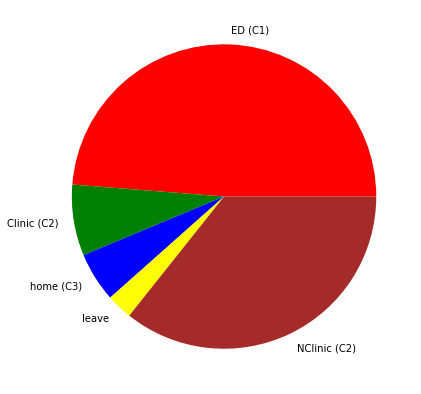

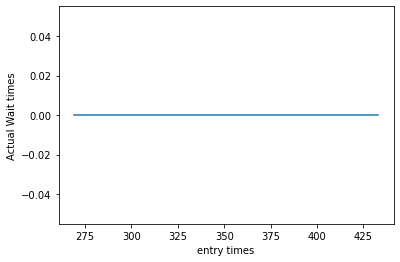

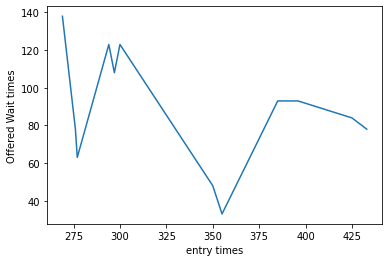

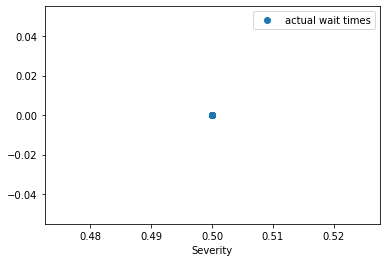

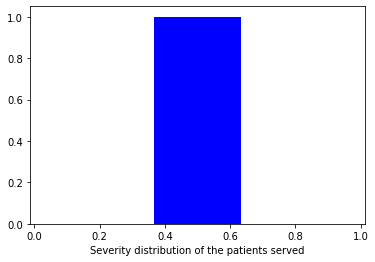

Entering Patients: In ED and NonED assigned by the hospital


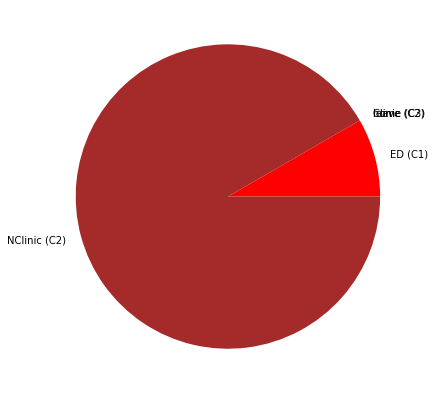

Final service received


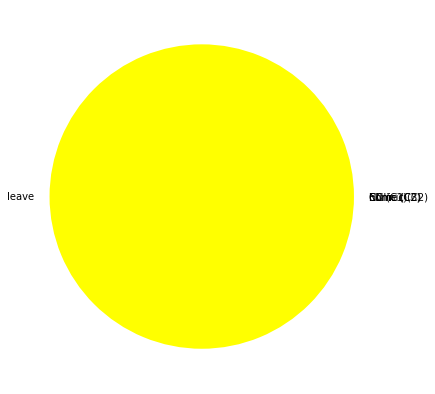

In [ ]:
#parameters and fixed variables 
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics


# Input parameters for the hospital

time = 800  #total time all queues are functional

mu_1, mu_2, mu_3 = 3, 10, 7 
# consider Poisson service rates of ED, Uniform : clinic and neg clinic - Adjustable


Thresh1, Thresh2  = 0.4, 0.7 #thresholds for home, clinc, ED - Adjustable 
#parameters that the hospital sets - Thresh1, Thresh2
# home : [0, Thresh1]  clinic : [Thresh1, 1]  ED : [Thresh2, 1]

lambda_1 = 2 #rate of poisson arrivals of patients into the system
#np.random.exponential(lambda_1)
lambda_list = []
lambda_list1 = [3, 5, 2, 1, 6, 4, 10, 3, 14, 11, 20, 23, 17, 15, 13, 2, 18, 7, 12, 13, 12, 9, 10, 5]
for i in lambda_list1 :
   for j in range(0,i,1) :
       lambda_list.append( round(10.0/i,4))
print(len(lambda_list))
p = 0.85 # probability of patients entering the Non ED queue
queues = ['ED', 'NonED']  #for randomly assigning 
probqueue = [1-p, p]  #q = np.random.choice(queues, 1, p=probqueue)

pcovid = 0.15  #probability of COVID patients coming in
disease = ['covid', 'noncovid']  #for randomly assigning 
probcovid = [pcovid , 1-pcovid]  # c = np.random.choice(disease, 1, p=probcovid)

risk = 0.2 # 0.9  #risk factor at the ED
IF = 0.5
sc=0.05 #scaling factor

#WTmax, WTmin = 0.08, 0  #Waiting Times range 
Wmin, Wmax = 0, 0  #shock to measure the severity (perceived) and utility 
x = np.linspace(0,1,5000)
srange = truncnorm.pdf(x, Wmin, Wmax, loc = 0, scale = 0.2) # pdf of the severity range
#s = truncnorm.rvs(Wmin, Wmax, loc = 0, scale = 0.2) 
#w = np.random.uniform(WTmin, WTmin)  #random number generator from uniform[WTmax, WTmin]

avg, std = 0.5, 0.2   #severity range between [0,1] with avg, std

a,b = 0,1  
a1, b1 = (a - avg) / std, (b - avg) / std
x = np.linspace(0,1,5000)
srange = truncnorm.pdf(x, a1, b1, loc = avg, scale = std) # pdf of the severity range
s = truncnorm.rvs(a1, b1, loc = avg, scale = std) #random number generator from this pdf
#fig, ax = plt.subplots(1, 1)
#ax.plot(x, truncnorm.pdf(x, a1, b1, loc = avg, scale = std),'r-', label='truncnorm pdf') #Prints the graph

s1, s2, s3 = 0.25, 0.5, 0.75 #shows initial data of incoming patients
severityd = [s1, s2, s3]
probseverity = [0.10, 0.6, 0.30]
probseverity = [0.13, 0.47, 0.40]
plt.pie(probseverity, labels = ['C3=0.25', 'C2=0.5', 'C1=0.75'], autopct='%1.0f%%') 
plt.show()

Php = sum(srange[ int(Thresh2 * 5000)  : 5000])/sum(srange) # probabilty of high priority patients in the ED
Php = 0.4

#runs the system for time t, and provides the complete hospital dashboard data
Homelist, leavelist, HPlist, LPlist, Cliniclist, Neglist, Patientslist, servedlist, t, timelist, qdhp, qdlp, qdc, qdn   = HospitalSystem(time, lambda_1, mu_1, mu_2, mu_3, Wmin, Wmax, a1, b1, avg, std, probqueue, probcovid, queues, disease)
EDlist = HPlist + LPlist

#prints all the parameters of the system
print('NonED/call proportion : ', p)
print('COVID proportion : ', pcovid)
Initialdata(p, pcovid, Patientslist)
print('Inflow rate of patients : ', lambda_1)
print('Risk and IF: ', risk, ',' , IF)
print('Service rates mu_1, mu_2, mu_3 : ', mu_1, ',',  mu_2, ',',  mu_3)
#severitylist = severityanalysis(Patientslist)
print('Simulation Outcomes : ')

#Complete output analysis of the system
throughput(leavelist, Homelist, servedlist , Patientslist)
queuelength(timelist, qdhp,qdlp,qdc,qdn)
totalanalysis(Patientslist)
#totalanalysis(servedlist)
#totalanalysis(EDlist)
#totalanalysis(Cliniclist)
#totalanalysis(Neglist)
totalanalysis(leavelist)
#totalanalysis(Homelist)




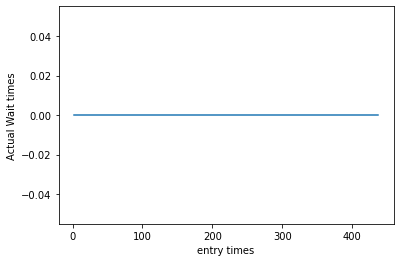

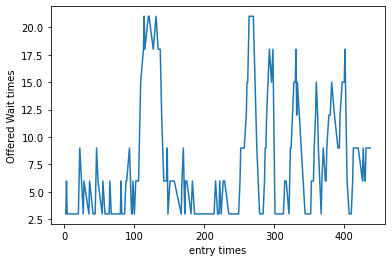

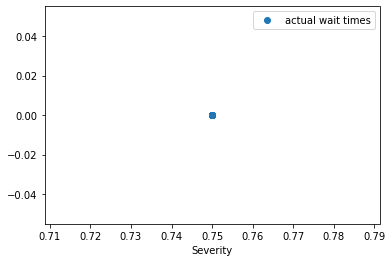

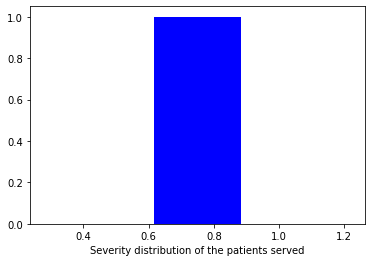

Entering Patients: In ED and NonED assigned by the hospital


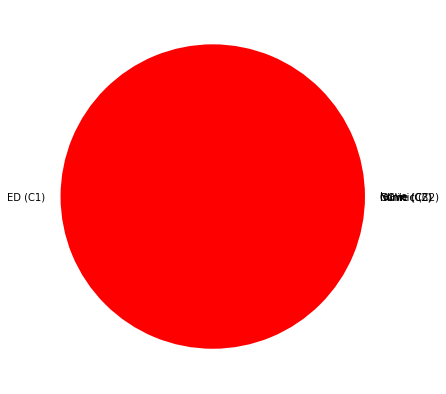

Final service received


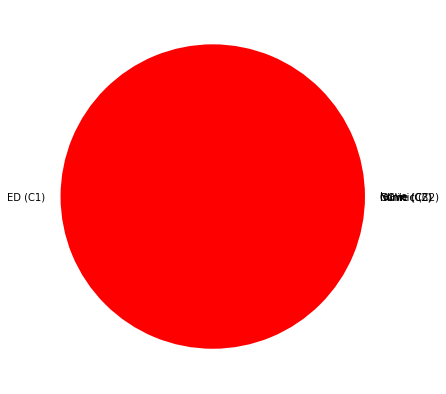

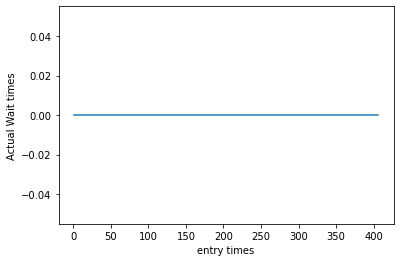

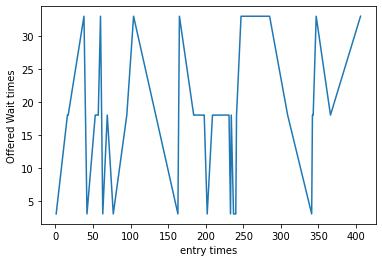

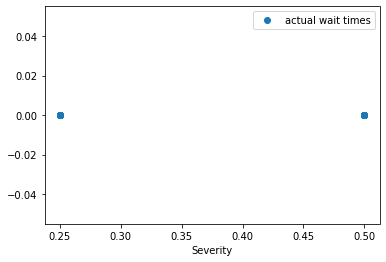

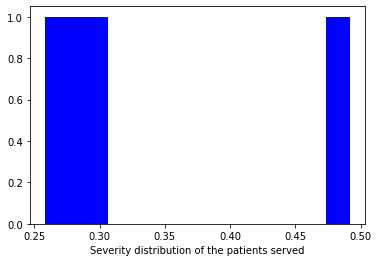

Entering Patients: In ED and NonED assigned by the hospital


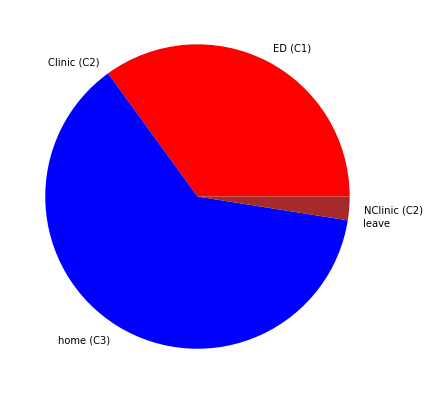

Final service received


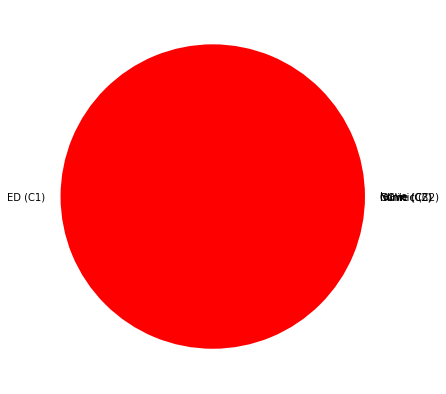

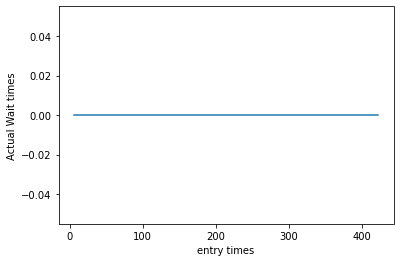

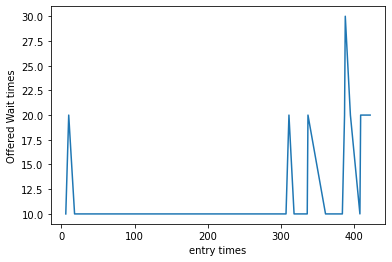

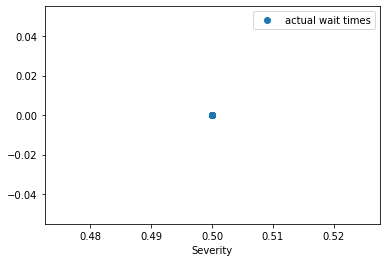

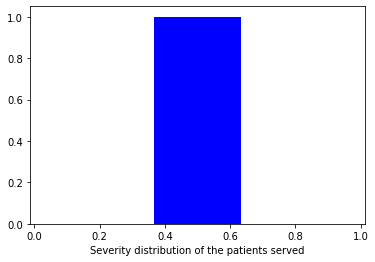

Entering Patients: In ED and NonED assigned by the hospital


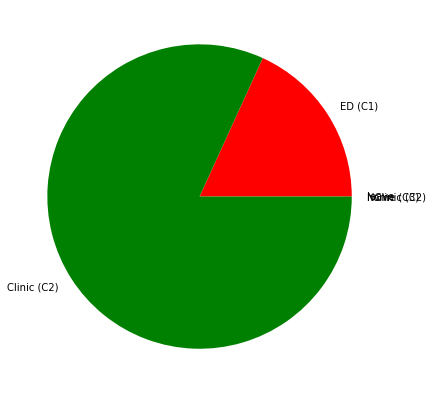

Final service received


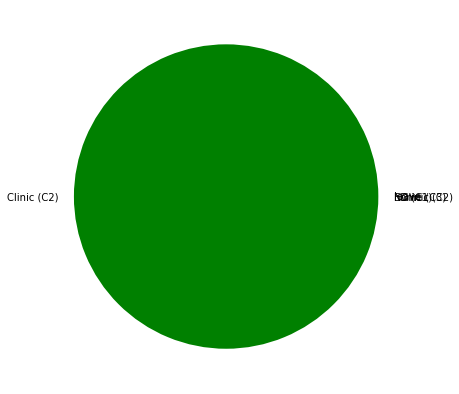

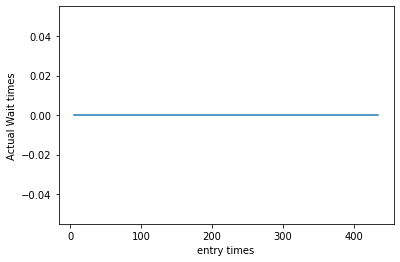

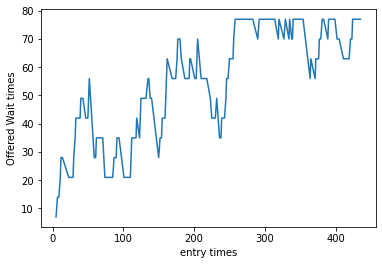

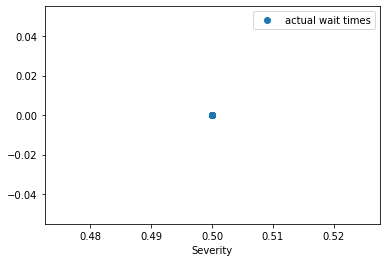

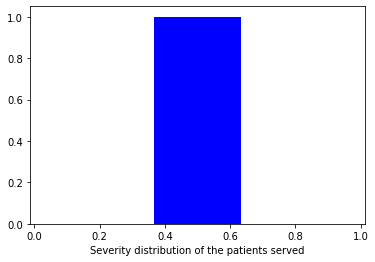

Entering Patients: In ED and NonED assigned by the hospital


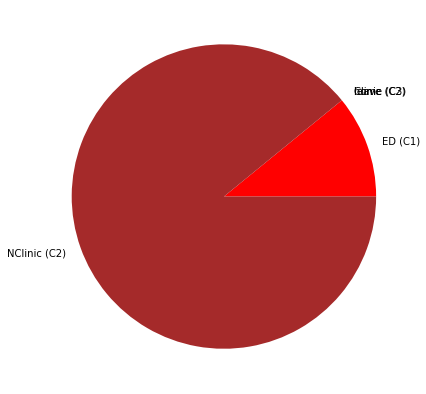

Final service received


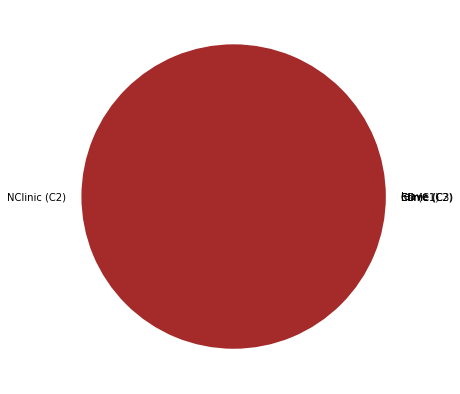

In [ ]:
totalanalysis(HPlist)
totalanalysis(LPlist)
totalanalysis(Cliniclist)
totalanalysis(Neglist)

In [ ]:
class Patients:               
    
    # The init method or constructor  
    def __init__(self, covid, queue, wait, entrytime, severity, pid, delaytime=0, history=[]):  
      
        # Instance Variable      
        self.covid = covid   #covid and noncovid
        self.queue = queue  #ED and NonED
        self.wait = wait   #random waiting time rates (from uniform distribution)
        self.entrytime= entrytime    # the time this patient enters
        self.severity = severity   #random severity from truncated normal distribution with avg, std
        self.pid= pid   #patient's unique ID to track the service received
        self.delaytime = delaytime    #Alloted waiting time
        self.history = history  #Queues and updates 

In [ ]:
#Hospital's decision function


def HD( self, severity, queue, history, entrytime):   #division of patients by hospital  depending on severity
    if self.queue == 'NonED':   #updates the queue only for Non-ED patients
   #     Thresh1=0.01
        if self.severity < Thresh1:
            self.queue = 'home'
            self.history.append(('home', self.entrytime))  #creating first history of patients coming to NonED
        if Thresh1 < self.severity < Thresh2:
            if self.covid == 'covid':
                self.queue = 'clinic'
                self.history.append(('clinic', self.entrytime))
            else:
                self.queue = 'Negclinic'
                self.history.append(('Negclinic', self.entrytime))
        if self.severity > Thresh2:
            self.queue = 'ED'
            self.history.append(('ED', self.entrytime))
    return self


def delayupdate(self, d):   #updating the delay time as given by the hospital
    self.delaytime = d
    return self

In [ ]:
# Fucntion which decides the wait time for patients depending on their queue type and severity
# capturing the time service is done.
def delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1):
    if self.queue == 'ED' :
        if self.severity > Thresh2:
            return mu_1*(len(HPQ)+1)
        else:  #Php = probability of High priority patients coming in ED
            return mu_1*(1+(len(HPQ) + len(LPQ))/(1- lambda_1* Php))
    if self.queue== 'clinic':
        return mu_2*(1+len(ClinicQ))
    if self.queue == 'Negclinic':
        return mu_3*(1+len(NegQ))
    if self.queue == 'home':
        return 0

In [ ]:
# Function for utilities 
r=1
def EDutility(self):
   # U = min(self.severity + (self.wait +risk)*dt , 1 )
    U = min( sc*(self.severity + self.wait + risk)*self.delaytime , r)
    if U==r:
        return False 
    else:
        return True 

def ClinicUtility(self):
    U = min(sc*(self.severity + self.wait)*self.delaytime*IF , r)
    if U==r:
        return False
    else:
        return True

In [ ]:
# Patients' decision function 
def PD(self, wait, history, entrytime, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1):    #for patients' decision about changing queues 
    if self.queue == 'ED':   #includes patients directly coming to ED and Non ED
        dt = delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1)
        self.delaytime = dt
        if EDutility(self) == False :   # Patients who dont want the ED 
            if len(self.history)==0:  # Patients entering NonED first time from ED
                self.history.append(('ED', self.entrytime))  #first history of ED
                self.queue= 'NonED'
                self = HD(self, severity, queue, history, entrytime) #updating queue and delaytime after joining NonED 
                d = delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1)
                self = delayupdate(self, d)
                dt = self.delaytime
                # second history is updated with the function 
                if self.queue == 'ED':
                    self.queue = 'leave'
                    self.history.append(('leave', self.entrytime))
                else:
                    if ClinicUtility(self) == False : # leave if clinic isn't good too
                        self.queue = 'leave'
                        self.history.append(('leave', self.entrytime))  #third history if they leave
                    else:
                        if self.queue == 'home' :  #assigned home by the hospital :
                            self.queue = 'home'
                          #  self.history.append((self.queue, self.entrytime))  #third history if they leave
                        else:  #assigned clinic by the hospital
                            if self.covid == 'covid':  #just restating the queues
                                self.queue = 'clinic'
                            else:
                                self.queue = 'Negclinic'
            else:   #NonED people who are assigned ED by the hospital
                #first history is already added when they enter
                self.queue = 'leave'
                self.history.append((self.queue, self.entrytime))  #second history when they leave

        else:  #people who want to stay in ED 
             if len(self.history)==0: # First history for people who stay in ED
                 self.queue = 'ED'
                 self.history.append(('ED', self.entrytime))  
          
    else:  #Patients who came to NonED first and got assigned at the clinic/home
        dt = delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1)#first history is added already
        self.delaytime = dt
        if self.queue =='home'  : # Patients in the home queue
            self.queue = 'ED' 
            d = delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1)
            self = delayupdate(self, d)  #check with the ED times
            dt = self.delaytime 
            if EDutility(self) == False:  #ED too risky, leave ED
                self.queue = 'home'
                self.delaytime = 0 # don't update the history again
            else:
                self.history.append(('ED', self.entrytime))  #second history for ED for people who want ED
                self.queue = 'ED'
        else:  #patients in the clinic queue. History is already added

            if ClinicUtility(self) == False : # Not satisfied with the clinic
                self.queue = 'ED'
                d = delay(self, covid, severity, queue, HPQ, LPQ, ClinicQ, NegQ, lambda_1)
                self= delayupdate(self, d)  #check with the ED times
                dt= self.delaytime 
                self.history.append(('ED', self.entrytime))  #second history for ED
                if EDutility(self) == False :  #ED too risky, leave
                    self.queue = 'leave' #not satisfied with the ED as well
                    self.history.append((self.queue, self.entrytime))  #third history if they leave
            #else: stay in the clinic or Negclinic
    

In [ ]:
#Addition of patients to their queues
def queueaddition(self, HPQ, LPQ, ClinicQ, NegQ, Homelist, leavelist , HPlist, LPlist, Cliniclist, Neglist):
    q = self.queue 
    if q == 'leave':
        leavelist.append(self)
    if q == 'home' :
        Homelist.append(self)
    if q == 'Negclinic':
        NegQ.append(self)
        Neglist.append(self)
    if q == 'clinic' :
        ClinicQ.append(self)
        Cliniclist.append(self)
    if q == 'ED':
        if self.severity > Thresh2:
            HPQ.append(self)
            HPlist.append(self)
        else:
            LPQ.append(self)
            LPlist.append(self)

In [ ]:
#function for patients exiting their queues after receiving services 
def constantservice(mu, timegap, previoustime, queuelist, t):
     newlist1 = np.repeat(mu, 50) #updated everytime, with previoustime as the first timestep
     if previoustime != 0:
         newlist1 = np.insert(newlist1, 0, previoustime, axis=0)
     serviced  = []
     sum = 0
     while sum + newlist1[0] < timegap :                                                                                                                                                                                                                                                                                                             
         if len(queuelist) == 0:  #break if empty 
             break
         else:
             pp = newlist1[0]  #time taken for service
             newlist1 = np.delete(newlist1, 0)            
             patient = queuelist.pop(0)  #removing patient from he current queue
             patient.queue = 'serviced'  #adding to the serviced queue
             serviced.append(patient)  #number of people treated in this iteration
             sum = sum + pp  #total time spent so far             
             patient.history.append((patient.queue, t+sum))  #update service history
           #  print(round(previoustime,2), round(timegap, 2))
             #print(len(queuelist))
             #print(round(t+sum -patient.history[0][1], 2), round(patient.delaytime, 2 ), patient.history[-2][0] )
             #We are capturing the time after service is done. The initial part of service time is lost 
             #  if the loop changes. 
     if len(queuelist) == 0:
         previoustime = 0  #no carry forward if the queue is empty
     else:
         previoustime = sum + newlist1[0] - timegap    #use this in the next loop
     return serviced, previoustime, queuelist  #serviced is the list of patients serviced.

 #let 20 be the limit of people getting out in one go
def poissonservice(mu, timegap, previoustime, queuelist, t):
     newlist1 = np.random.exponential(mu,50)  #updated everytime, with previoustime as the first timestep
     if previoustime != 0:
        newlist1= np.insert(newlist1, 0, previoustime, axis=0)
     serviced  = []
     sum = 0
     while sum + newlist1[0] < timegap :
         if len(queuelist) == 0:  #break if empty 
             break
         else:
             pop = newlist1[0]  #time taken for service
             newlist1 = np.delete(newlist1, 0)            
             patient = queuelist.pop(0)  #removing patient from he current queue
             patient.queue = 'serviced'  #adding to the serviced queue
             serviced.append(patient)  #number of people treated in this iteration
             sum = sum + pop  #total time spent so far
             patient.history.append((patient.queue, t+sum))  #update service history
             #print(patient.history)
             #print(round(t+sum -patient.history[0][1], 2), round(patient.delaytime, 2 ), patient.history[-2][0] )
             #We are capturing the time after service is done. The initial part of service time is lost 
             #  if the loop changes. 
     if len(queuelist) == 0:
         previoustime = 0  #no carry forward if the queue is empty
     else:
         previoustime = sum +  newlist1[0] - timegap    #use this in the next loop
     return serviced, previoustime, queuelist  #serviced is the list of patients serviced. 
      

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    #All action happens here. Patients enter randomly, leave or receive service and exit.
def HospitalSystem(time, lambda_1, mu_1, mu_2, mu_3, Wmin, Wmax, a1, b1, avg, std, probqueue, probcovid, queues, disease):
    HPQ=[]   #high priority queue at the ED
    LPQ=[]   #low priority queue at the ED
    ClinicQ=[]   #creating functional queues
    NegQ =[]
    HPlist=[]
    LPlist=[]
    Cliniclist=[]   #initiating lists where all Q information is stored
    Neglist=[]
    Homelist =[]
    leavelist=[]
    servedlist=[]  #creating all lists 
    Patientslist =[]
    pid=0               
    timelist = []      #list of times at arrivals
    qdhp=[] #queue data for all queues : length of queue at the time of arrivals
    qdlp=[]  
    qdc=[]
    qdn=[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    t=0
    previoustime1, previoustime2, previoustime3 = 0 , 0 , 0
    while t > -1:
        servicedHP=[]  #to keep a track of patients getting treated in one iteration
        servicedLP =[]
        serviced2=[]
        serviced3=[]
        timegap = np.random.exponential(lambda_1)
        timelist.append(t)
        #timegap = lambda_list.pop(0)
        serviced2, previoustime2, ClinicQ = constantservice(mu_2, timegap, previoustime2, ClinicQ, t)
        serviced3, previoustime3, NegQ = constantservice(mu_3, timegap, previoustime3, NegQ, t)
        if len(HPQ) == 0:
            servicedLP, previoustime1, LPQ = poissonservice(mu_1, timegap, previoustime1, LPQ, t)
        if len(HPQ) > 0 :
            servicedHP, previoustime1, HPQ = poissonservice(mu_1, timegap, previoustime1, HPQ, t)
            if len(HPQ) == 0:
                servicedLP, previoustime1, LPQ = constantservice(mu_1, previoustime1, 0, LPQ, t)
        servedlist = servedlist + servicedHP + serviced2 + serviced3 + servicedLP    
        ql1, ql2, ql3, ql4  = len(HPQ), len(LPQ), len(ClinicQ), len(NegQ) #queue lengths
        qdhp.append(ql1)
        qdlp.append(ql2+ql1)
        qdc.append(ql3)
        qdn.append(ql4)
        t = timegap + t # remove patients from service queues before adding a new patient
        if t > time :
            print('time: ', t)
            break
        pid = pid+1
        #lambda_1 = 1.0/timegap
        #w = np.random.uniform(WTmin, WTmax)
        #w = truncnorm.rvs(Wmin, Wmax, loc = 0, scale = 0.2) 
        w = 0 
        #s = truncnorm.rvs(a1, b1, loc = avg, scale = std)
        s = np.random.choice(severityd, 1, p=probseverity)
        #self, covid, queue, wait, entrytime, severity, pid, delaytime=0, history
        history=[]
        c = np.random.choice(disease, 1, p=probcovid)
        q = np.random.choice(queues, 1, p=probqueue)
        P = Patients( c, q, w, t, s, pid, delaytime=0, history=[])
        P = HD(P, s, q, history, t)  #Hospital's decision, effective if NonED
        PD(P, w, history, t, c, s, q, HPQ, LPQ, ClinicQ, NegQ, lambda_1)
        Patientslist.append(P)
        queueaddition( P,  HPQ, LPQ, ClinicQ, NegQ, Homelist, leavelist, HPlist, LPlist, Cliniclist, Neglist)
        #print(P.history) 

    return Homelist, leavelist, HPlist, LPlist, Cliniclist, Neglist, Patientslist, servedlist, t, timelist, qdhp, qdlp, qdc, qdn

In [ ]:
#performance measures 
#Creating list of indices in Pateintslist according to queues
def queuelength(timelist, qdhp,qdlp,qdc,qdn):
    plt.plot( timelist, qdhp , label="HPED" )
    plt.yticks(range(1,max(qdhp)+1))
    plt.ylabel("Number of patients")
    plt.xlabel("Time : HPED")
    plt.show()
    plt.plot(timelist,  qdlp, label="LPED")
    plt.yticks(range(1,max(qdlp)+1))
    plt.xlabel("Time : LPED")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdc,  label="Clinic")  
    plt.yticks(range(1,max(qdc)+1))
    plt.xlabel("Time : Clinic")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdn, label="NClinic" )
    plt.yticks(range(1,max(qdn)+1))
    plt.xlabel("Time : NClinic")
    plt.ylabel("Number of patients")
    plt.show()


def minmaxanalysis(Anylist):  #statistics of a list
    minimum = min(Anylist)
    maximum = max(Anylist)
    mean = sum(Anylist)/len(Anylist)
    stddev = statistics.stdev(Anylist)
    return round(minimum, 3) , round(maximum, 3), round(mean, 3), round(stddev, 3)

#Analysis of offered vs actual wait times of Anylist : Patientslist, leave, home, clinic, neg, ED 
def WTanalysis(Anylist):
    offeredwait=[]
    actualwait=[]
    difference=[] #offered - actual 
    pidlist=[]
    for P in Anylist:
        s = P.pid
        pidlist.append(s)
    for P in Anylist:
        o = P.delaytime
        a = P.history[-1][1] - P.history[0][1]
        offeredwait.append(o)
        actualwait.append(a)
        difference.append( o-a )
    actualwait2 = [x for _,x in sorted(zip(pidlist,actualwait))]
    offeredwait2 = [x for _,x in sorted(zip(pidlist,offeredwait))]
    pidlist.sort()
    plt.xlabel('entry times')
    plt.ylabel('Actual Wait times')
    plt.plot(pidlist, actualwait2)
    plt.show
    plt.figure()
    plt.plot(pidlist, offeredwait)
    plt.xlabel('entry times')
    plt.ylabel('Offered Wait times')
    plt.show
    #plt.plot(pidlist, difference)
  #  plt.legend(['actual times', 'offered times', 'difference'], loc='upper right')
    return offeredwait , actualwait, difference
   # return minmaxanalysis(offeredwait), minmaxanalysis(actualwait), minmaxanalysis(difference)

def throughput(leavelist, Homelist, servedlist, Patientslist):
    print('Total patients: ', len(Patientslist))
    print('Number of patients who left the system: ', len(leavelist))
    print('Number of patients who are sent home : ', len(Homelist))
    print('Number of patients served in total : ', len(servedlist))

def severityanalysis(Anylist):  #severity vs the wait times #severity in a facility
    severitylist=[]
    offeredwait, actualwait, difference = WTanalysis(Anylist)
    for P in Anylist:
        s = P.severity
        severitylist.append(s)
    plt.figure()
    plt.plot(severitylist, actualwait, 'o')
    #plt.plot(severitylist, offeredwait)
    #plt.plot(severitylist, difference)
    plt.xlabel('Severity')
    plt.legend(['actual wait times'], loc='upper right') #'offered times', 'difference'
    plt.show()

    offeredwait = [x for _,x in sorted(zip(severitylist,offeredwait))]
    actualwait = [x for _,x in sorted(zip(severitylist,actualwait))]
    difference = [x for _,x in sorted(zip(severitylist,difference))]
    severitylist.sort()
    
    plt.hist(severitylist, 3, facecolor= 'blue')
    plt.xlabel("Severity distribution of the patients served")
    plt.show()
    
    return severitylist

def switches(anylist, n):  #check the initial with n=0, last with n=-1
    first=0
    second=0
    third = 0
    fourth=0
    fifth=0
    sixth=0
    label1='ED'
    label2= 'Clinic'
    label5= 'NegClinic'
    #prints a piechart of patients categorized into their initial queues and final queues  
    for p in anylist:
            h=p.history
            if h[-1][0] == 'serviced':
                del h[-1]
            if h[n][0]== 'ED':
                first=first+1
            if h[n][0]== 'clinic':
                second = second+1
            if h[n][0] == 'Negclinic':
                fifth= fifth +1
            if h[n][0] == 'home':
                third = third+1
            if h[n][0] == 'leave':
                fourth = fourth+1
    
    labels = ['ED (C1)', 'Clinic (C2)',  'home (C3)', 'leave', 'NClinic (C2)',]
    sizes = [first, second,  third, fourth, fifth]
    colors = ['red', 'green', 'blue', 'yellow', 'brown']
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(sizes, labels = labels, colors= colors) 
    plt.show()

def Initialdata(p, pcovid, Patientslist):
    l = len(Patientslist)
    sizes= [ l*p*(1-pcovid), l*(p)*pcovid, l*(1-pcovid)*(1-p), l*(1-p)*pcovid]
    labels =['NonED-Normal', 'NonED- COVID', 'ED- Normal', 'ED- COVID']
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(sizes, labels = labels) 
    print('Initial probabilistic data')
    plt.show()

def totalanalysis(anylist):
    #offeredwait, actualwait, difference = WTanalysis(anylist)
    #minimum, maximum, mean, stddev = minmaxanalysis(offeredwait)
    #print('Offered wait times analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    #minimum, maximum, mean, stddev = minmaxanalysis(actualwait)
    #print('Actual wait times analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
   # minimum, maximum, mean, stddev = minmaxanalysis(difference)
    #print('Analysis of their difference:', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    severitylist = severityanalysis(anylist)
   # minimum, maximum, mean, stddev = minmaxanalysis(severitylist)
    #print('Severity analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    print('Entering Patients: In ED and NonED assigned by the hospital')
    switches(anylist, 0)
    print('Final service received')
    switches(anylist, -1)

